In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assign the filename: file
file = 'chess_games.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

In [2]:
df #dataframe object. R has same, SQL has database tables. every column is filled with the same datatype
print(df.head()) #used to display first few rows of dataframe
print(df.info()) # names of columns, datatypes contained, and whether they have missing values
print(df.shape) #attribute, not method, so no (). displays # of rows and columns
print(df.describe()) #summary statistics. good overview of numeric variables
print(df.values) #2d array of data in df
print(df.columns)
print(df.index)

   game_id  rated  turns victory_status winner time_increment       white_id  \
0        1  False     13    Out of Time  White           15+2       bourgris   
1        2   True     16         Resign  Black           5+10           a-00   
2        3   True     61           Mate  White           5+10         ischia   
3        4   True     61           Mate  White           20+0  daniamurashov   
4        5   True     95           Mate  White           30+3      nik221107   

   white_rating      black_id  black_rating  \
0          1500          a-00          1191   
1          1322     skinnerua          1261   
2          1496          a-00          1500   
3          1439  adivanov2009          1454   
4          1523  adivanov2009          1469   

                                               moves opening_code  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 

In [3]:
#sort values by value of a column name. can use multipe values for sorting. these values can be sorted different ways
df.sort_values(['white_rating', 'turns'], ascending = [False, False])

cols = list(df.columns.values)
cols
#printed that out to rearrange the columns
df = df[['game_id', 'winner','victory_status','rated','white_rating','black_rating','turns','time_increment','white_id', 'black_id','opening_code', 'opening_moves', 'opening_fullname','opening_shortname', 'opening_response', 'opening_variation','moves',]]
# to select multiple columns, you need two pairs of brackets
df['winner'] == 'White'

df[df['winner'] == 'White'].head(2)

#this is subsetting, taking a condition and subsetting the dataframe based on it. assign a new df name to copy that data

,game_id,winner,victory_status,rated,white_rating,black_rating,turns,time_increment,white_id,black_id,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,moves
0,1,White,Out of Time,False,1500,1191,13,15+2,bourgris,a-00,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
2,3,White,Mate,True,1496,1500,61,5+10,ischia,a-00,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...


In [4]:
df[df['victory_status']=='Out of Time'].head()

#this is subsetting, taking a condition and subsetting the dataframe based on it. assign a new df name to copy that data
#notice how few rows there are of this data

,game_id,winner,victory_status,rated,white_rating,black_rating,turns,time_increment,white_id,black_id,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,moves
0,1,White,Out of Time,False,1500,1191,13,15+2,bourgris,a-00,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
101,102,White,Out of Time,True,1724,1855,75,10+0,avelez8,vincenzo2000,C45,7,Scotch Game,Scotch Game,NaN,NaN,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Ne5 Nc3 Bb4 Bd2 Nf6...
103,104,White,Out of Time,True,1726,1388,81,10+0,avelez8,pavankumarg,C41,5,Philidor Defense,Philidor Defense,NaN,NaN,e4 e5 Nf3 d6 d4 Nc6 dxe5 dxe5 Qxd8+ Kxd8 Bb5 B...
108,109,White,Out of Time,True,1746,1487,137,10+0,avelez8,frynoodles,D20,5,Queen's Gambit Accepted: Old Variation,Queen's Gambit,Accepted,Old Variation,d4 d5 c4 dxc4 e3 Nf6 Bxc4 Bf5 Nf3 e6 O-O Bd6 N...
119,120,White,Out of Time,True,1724,1958,49,8+0,cdvh,capito2017,A43,5,Benoni Defense: Benoni-Indian Defense | Kings...,Benoni Defense,NaN,Benoni-Indian Defense,d4 Nf6 Nf3 c5 d5 d6 Nc3 e5 e4 Be7 Bd3 Nbd7 O-O...


In [5]:
# Assign the filename: file
file = 'chess_games.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)


#subsetting off of multiple condtions
#↓↓↓↓↓


OoT = df['victory_status'] =='Out of Time'
Ww = df['winner'] == 'White'
fast_game = df['turns'] < 20

er = df[OoT & Ww & fast_game]
er


,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1279,1280,False,7,Out of Time,White,10+0,axelpro446,1501,plenad,1797,e4 e5 Nf3 Nc6 Nc3 Bb4 d4,C46,6,Three Knights Opening #2,Three Knights Opening,NaN,#2
1921,1922,True,3,Out of Time,White,10+0,oceannnn,1375,brorael357,1332,d4 d5 Nf3,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
1977,1978,False,1,Out of Time,White,10+60,clarkkent89,2032,tactical_bishop,1223,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
2366,2367,True,15,Out of Time,White,8+5,vfhfnvfhfn22,1635,fabian27,1647,d4 e5 dxe5 a6 Nf3 Nc6 Bf4 h6 Nbd2 Bb4 c3 Ba5 e...,A40,2,Englund Gambit,Englund Gambit,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17346,17347,False,3,Out of Time,White,8+5,basilis,1546,danko_25,1885,e4 c5 d3,B20,2,Sicilian Defense,Sicilian Defense,NaN,NaN
18125,18126,False,8,Out of Time,White,5+10,alpha3031,1193,aysallinn,1430,e4 d5 Nc3 d4 Nd5 e6 Nf4 e5,B01,2,Scandinavian Defense,Scandinavian Defense,NaN,NaN
18465,18466,True,11,Out of Time,White,10+0,fourtwenty,1570,rogerbill,1724,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 d6 Nxc6 bxc6 Nc3,B32,7,Sicilian Defense: Open #3,Sicilian Defense,NaN,Open #3
18731,18732,True,5,Out of Time,White,150+0,omid27,2151,dr-muscle,1717,d4 d5 c4 Nf6 cxd5,D06,4,Queen's Gambit Refused: Marshall Defense,Queen's Gambit,Refused,Marshall Defense


In [6]:
# Assign the filename: file
file = 'chess_games.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)


#subsetting off of multiple condtions
#↓↓↓↓↓
# 1 row

faster = df[(df['victory_status'] =='Out of Time') & (df['winner'] == 'White') & (df['turns'] < 8)]
print(faster.shape)
faster

(39, 17)


,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
1279,1280,False,7,Out of Time,White,10+0,axelpro446,1501,plenad,1797,e4 e5 Nf3 Nc6 Nc3 Bb4 d4,C46,6,Three Knights Opening #2,Three Knights Opening,NaN,#2
1921,1922,True,3,Out of Time,White,10+0,oceannnn,1375,brorael357,1332,d4 d5 Nf3,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
1977,1978,False,1,Out of Time,White,10+60,clarkkent89,2032,tactical_bishop,1223,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
2727,2728,True,7,Out of Time,White,10+0,jdy,1099,mauzi123,1198,e4 e5 d4 f5 Qd3 fxe4 Qxe4,C21,3,Center Game #2,Center Game,NaN,#2
2742,2743,True,3,Out of Time,White,15+15,jdy,1045,annonhaseyo,1080,e4 e5 d4,C21,3,Center Game #2,Center Game,NaN,#2
3879,3880,True,5,Out of Time,White,10+0,lewispugdog,1046,alexmorato,986,e4 e5 Nc3 c6 Nf3,C27,3,Vienna Game,Vienna Game,NaN,NaN
4115,4116,False,1,Out of Time,White,5+15,fairygirl,2404,oreo_or_orion,1616,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
4473,4474,False,1,Out of Time,White,5+5,ranchowangdu,1500,justicebot,2723,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
5496,5497,False,1,Out of Time,White,5+15,slowgamer,2100,ytdvvc,1404,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
5856,5857,False,5,Out of Time,White,180+0,grundlesniffer,1370,tomo1997,1500,d4 e5 e3 Bb4+ c3,A40,3,Englund Gambit Declined | Reversed French,Englund Gambit,Declined,NaN


In [7]:
is_mate_and_resign = df['victory_status'].isin(['Mate','Resign']) #subsetting off of two variables within one column
df[is_mate_and_resign]

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
6,7,True,33,Resign,White,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,10,Blackmar-Diemer Gambit: Pietrowsky Defense,Blackmar-Diemer Gambit,NaN,Pietrowsky Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,20054,True,24,Resign,White,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20054,20055,True,82,Mate,Black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20055,20056,True,35,Mate,White,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack
20056,20057,True,109,Resign,White,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,4,Pirc Defense,Pirc Defense,NaN,NaN


In [8]:
df_highturn = df.sort_values('turns', ascending = False)
df_highturn

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
13859,13860,True,349,Out of Time,White,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,13,Queen's Gambit Declined: Hastings Variation,Queen's Gambit,Declined,Hastings Variation
11554,11555,True,349,Out of Time,White,10+0,shiwen,2194,kijek,2240,d4 d5 c4 c6 Nf3 Nf6 Nc3 e6 Bg5 h6 Bxf6 Qxf6 Qb...,D30,13,Queen's Gambit Declined: Hastings Variation,Queen's Gambit,Declined,Hastings Variation
16386,16387,True,259,Draw,Draw,15+5,aragon26,1441,lone-wolf,1461,d4 d5 c4 c6 Nc3 Nf6 Bg5 Nbd7 Qc2 Qb6 e3 h6 Bf4...,D10,5,Slav Defense #2,Slav Defense,NaN,#2
4236,4237,True,255,Draw,Draw,7+2,manipin,1585,kasparovd0311,1448,e4 e6 Nc3 d5 exd5 exd5 d4 Nf6 Bf4 Be7 Nf3 O-O ...,C00,3,French Defense: Queen's Knight,French Defense,NaN,Queen's Knight
16645,16646,True,226,Draw,Draw,10+0,chunnev,1817,jhonthoth,1907,e4 e6 Nf3 d5 exd5 exd5 d4 Nf6 Bg5 Be7 Nc3 Be6 ...,C00,3,French Defense: Knight Variation,French Defense,NaN,Knight Variation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,18584,True,1,Resign,White,10+0,adriansywu,1431,usa-04071776,1367,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
1977,1978,False,1,Out of Time,White,10+60,clarkkent89,2032,tactical_bishop,1223,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN
13701,13702,True,1,Resign,Black,10+0,networkchess2,1878,kaskade24,1860,d3,A00,1,Mieses Opening,Mieses Opening,NaN,NaN
5496,5497,False,1,Out of Time,White,5+15,slowgamer,2100,ytdvvc,1404,e4,B00,1,King's Pawn,King's Pawn,NaN,NaN


In [9]:
# Assign the filename: file
file = 'chess_games.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

#figure out how to figure an upset. a win for the lower ranked 
upset_for_black = df[(df["black_rating"] < df['white_rating']) & (df['winner'] == 'Black')]
ub = upset_for_black
upset_for_white = df[(df["white_rating"] < df['black_rating']) & (df['winner'] == 'White')]
uw= upset_for_white


both = [upset_for_black, upset_for_white]

upsets = pd.concat(both)

In [10]:
#finding big upsets
bb_upset = ub[ub['white_rating'] - ub['black_rating'] >= 99 ]
bw_upset = uw[uw['black_rating'] - uw['white_rating'] >= 99 ]
big_ups = [bb_upset,bw_upset]
big_upsets = pd.concat(big_ups)
big_upsets
bu=big_upsets
bu.reset_index()

,index,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,27,28,True,54,Mate,Black,10+10,mannat1,1328,shivangithegenius,1038,d4 d5 Nc3 Nf6 Nf3 Nc6 e3 Bf5 h4 e6 g3 Bb4 a3 B...,D01,4,Queen's Pawn Game: Chigorin Variation,Queen's Pawn Game,NaN,Chigorin Variation
1,30,31,True,64,Resign,Black,10+10,biyanivedant01,1358,shivangithegenius,1036,e4 c5 d4 cxd4 Qxd4 Nc6 Qa4 Nf6 Nc3 g6 Nf3 Bg7 ...,B21,3,Sicilian Defense: Smith-Morra Gambit #2,Sicilian Defense,NaN,Smith-Morra Gambit #2
2,31,32,True,64,Mate,Black,10+10,rv0209,1200,shivangithegenius,1002,e4 c5 Nf3 d6 Bb5+ Bd7 Bxd7+ Nxd7 O-O Ngf6 Nc3 ...,B52,6,Sicilian Defense: Canal Attack | Main Line,Sicilian Defense,NaN,Canal Attack
3,41,42,False,71,Resign,Black,5+5,milestretch,1241,shivangithegenius,978,e4 c5 Nc3 d6 Bc4 Nf6 Qe2 g6 e5 dxe5 Qxe5 Qd4 B...,B23,3,Sicilian Defense: Closed Variation,Sicilian Defense,NaN,Closed Variation
4,53,54,False,36,Resign,Black,10+0,lucasimeon,1500,shivangithegenius,978,c4 e5 b3 d5 Bb2 e4 d4 exd3 Qxd3 Nf6 Be5 dxc4 b...,A20,2,English Opening: King's English Variation,English Opening,NaN,King's English Variation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,19961,19962,True,105,Resign,White,30+30,marstem,1891,kerese1980,2106,b3 e5 Bb2 d6 e3 Nc6 Bb5 Bd7 Nf3 Nf6 O-O Be7 d4...,A01,3,Nimzo-Larsen Attack: Modern Variation #2,Nimzo-Larsen Attack,NaN,Modern Variation #2
2739,19978,19979,True,119,Resign,White,30+30,marstem,1817,sheepnl,2050,b4 d5 Bb2 e6 a3 Nf6 e3 c5 b5 b6 Nf3 Bb7 d4 Nbd...,A00,1,Polish Opening,Polish Opening,NaN,NaN
2740,19983,19984,True,131,Resign,White,30+30,liamschauerman,1883,rb52,2067,e4 d6 d4 Nf6 Nc3 g6 Be3 Bg7 f3 O-O Bc4 c6 Qd2 ...,B07,6,Pirc Defense #3,Pirc Defense,NaN,#3
2741,19984,19985,True,8,Resign,White,30+0,liamschauerman,1866,rb52,2088,e4 d6 d4 Nf6 Nc3 g6 Be3 Bg7,B07,6,Pirc Defense #3,Pirc Defense,NaN,#3


In [11]:
#trying another way

skill_difference = (upsets['white_rating'] - upsets['black_rating']).abs()
upsets['skill_difference'] = skill_difference
upsets['skill_difference'].sort_values(ascending = False)


4473     1223
12210    1121
3554     1045
11973    1013
11808    1008
         ... 
12855       1
15004       1
1273        1
3177        1
15362       1
Name: skill_difference, Length: 6566, dtype: int64

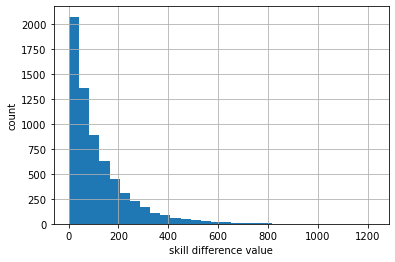

In [12]:
upsets.skill_difference.hist(bins=30)
plt.xlabel('skill difference value')
plt.ylabel('count');


In [13]:
upset_openings = upsets.groupby('opening_shortname')['game_id'].count().sort_values(ascending = False)

<AxesSubplot:ylabel='opening_shortname'>

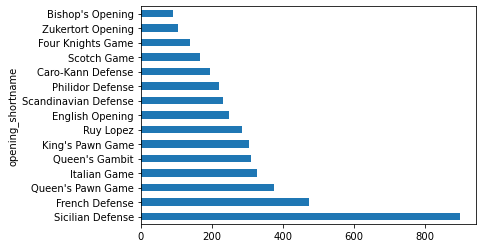

In [14]:
upset_openings.head(15).plot(kind = 'barh')

In [15]:
opens_and_results = df.groupby(['opening_shortname','victory_status'])['game_id'].count()
opens_and_results = pd.DataFrame(opens_and_results)
opens_and_results.sort_values(by = ['opening_shortname','victory_status'],ascending=False)

game_id
opening_shortname         victory_status         
Zukertort Opening         Resign              184
                          Out of Time          23
                          Mate                102
                          Draw                 27
Yusupov-Rubinstein System Resign                9
...                                           ...
Amar Opening              Mate                  3
Alekhine Defense          Resign               99
                          Out of Time          16
                          Mate                 67
                          Draw                 10

[416 rows x 1 columns]

In [16]:
black_id = df['black_id'].to_numpy()
print(black_id)
print(len(black_id))
white_id = df['white_id'].to_numpy()

users_list = white_id + black_id

res = []
for i in users_list:
    if i not in res:
        res.append(i)

users = np.array(res)
users = np.unique(users, axis = 0)
len(users)

['a-00' 'skinnerua' 'a-00' ... 'schaaksmurf3' 'jamboger' 'ffbob']
20058


17826

In [18]:
for i in df['upset']:
    
    if df['game_id'] is in upsets['game_id']:
        df['upset'] = True
    

df

SyntaxError: invalid syntax (<ipython-input-18-50b40dcdfeda>, line 3)

In [19]:
where df.loc[df['white_rating'] > df['black_rating']], 

SyntaxError: invalid syntax (<ipython-input-19-80b2024c938d>, line 1)

In [20]:
#df.assign(skill_difference=(df.white_rating - df.black_rating).where(df.white_rating > df.black_rating, 0))
df.assign(skill_difference=(df.white_rating - df.black_rating).abs())
df.assign.(upset=[(df.winner='White')where(df.black_rating>df.white_rating) & (df.winner='Black')where(df.black_rating<df.white_rating)] 


SyntaxError: invalid syntax (<ipython-input-20-504d1eb901f1>, line 3)